
A black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:







$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

The function is guaranteed to return the bitwise product of the input with some string, $s$. 


In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)} =\ x_0 * s_0+x_1*s_1+x_2*s_2+...\ $ mod 2

The quantum Bernstein-Vazirani Oracle:
    
1. Initialise the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

## Example Two Qubits:

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>


In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
s = 101011

In [3]:
from qiskit import *

**Step 1**

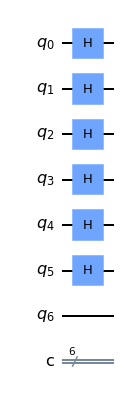

In [4]:
qc = QuantumCircuit(6+1,6)
qc.h([0,1,2,3,4,5])
qc.draw('mpl')

**Step 2**

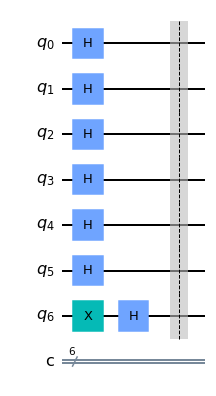

In [5]:
qc.x(6)
qc.h(6)
qc.barrier()
qc.draw('mpl')

**Step 3**

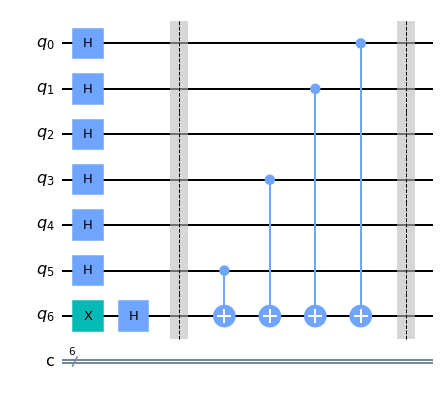

In [6]:
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.barrier()
qc.draw('mpl')

**Step 4**

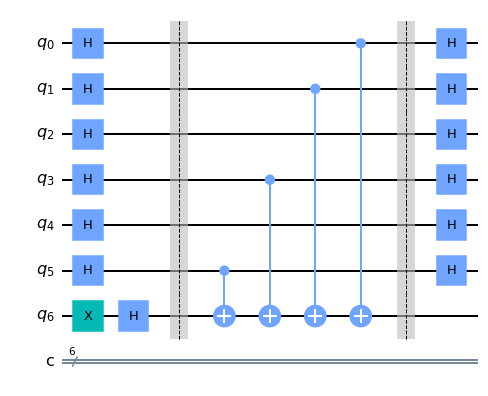

In [7]:
qc.h([0,1,2,3,4,5])
qc.draw('mpl')

**Step 5**

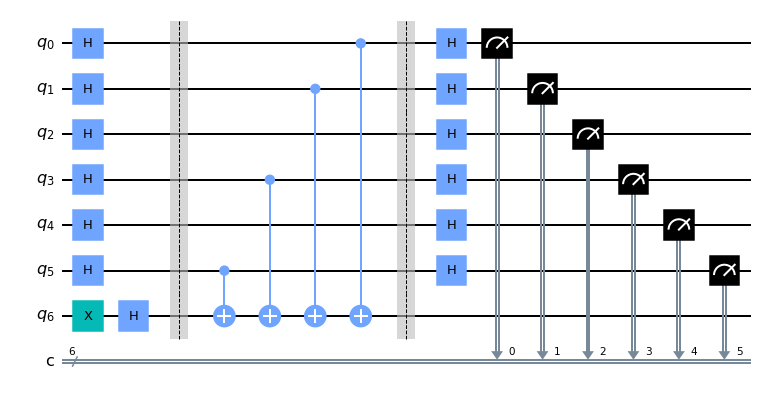

In [8]:
qc.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
qc.draw('mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
counts =result.get_counts()
print(counts)

{'101011': 1}
